In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('data-kiem-tra-2.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.set_index('date')
df.head(20)

,truong_1,truong_2,truong_3,truong_4,truong_5
date,,,,,
2013-05-10,4,58,3773,299.0,1
2013-05-26,4,58,3768,249.0,1
2013-05-19,4,58,4036,419.0,1
2013-05-25,4,58,12878,149.0,1
2013-05-15,4,58,12885,148.0,1
2013-05-15,4,58,12886,148.0,1
2013-05-15,4,59,2678,499.5,1
2013-05-26,4,59,2458,299.0,1
2013-05-25,4,59,2447,1999.0,1


In [66]:
df_2 = df[['truong_2']]
df_2

,truong_2
date,
2013-05-10,58
2013-05-26,58
2013-05-19,58
2013-05-25,58
2013-05-15,58
...,...
2013-11-07,37
2013-11-18,37
2013-11-24,37


In [67]:
daily = df_2.groupby(['date']).sum()
daily

,truong_2
date,
2013-05-01,42989
2013-05-02,39975
2013-05-03,38414
2013-05-04,34386
2013-05-05,33559
...,...
2013-11-26,13603
2013-11-27,12428
2013-11-28,13724


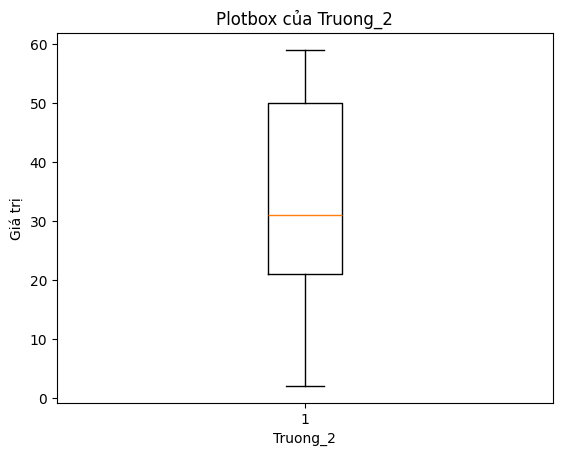

In [68]:
plt.boxplot(df['truong_2'])
plt.xlabel('Truong_2')
plt.ylabel('Giá trị')
plt.title('Plotbox của Truong_2')
plt.show()

<Figure size 2000x1000 with 0 Axes>

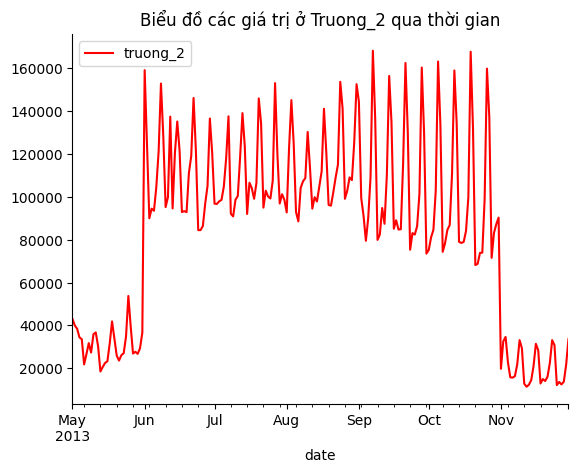

In [69]:
plt.figure(figsize=(20,10))
daily.plot(kind = 'line',title="Biểu đồ các giá trị ở Truong_2 qua thời gian", color='red')
plt.gca().spines[['top','right']].set_visible(False)

SARIMA

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Tìm tham số tốt nhất cho mô hình
stepwise_model = auto_arima(daily, seasonal=True, m=7, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

print(stepwise_model.summary())
print(stepwise_model.order)
print(stepwise_model.seasonal_order)
print(f'Best Model: SARIMA')

# Lấy các tham số từ mô hình tự động
p, d, q = stepwise_model.order
P, D, Q, s = stepwise_model.seasonal_order

# Xây dựng mô hình SARIMA với các tham số tìm được
model = SARIMAX(daily, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4735.996, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4914.556, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4808.839, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4851.159, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4912.559, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=4792.759, Time=0.47 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=4753.185, Time=0.46 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=4737.877, Time=1.35 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=4737.672, Time=1.10 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=4855.947, Time=0.28 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=4775.170, Time=0.80 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=4743.956, Time=0.96 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=4738.942, Time=1.70 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=4735.888, Time=0.41 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwar

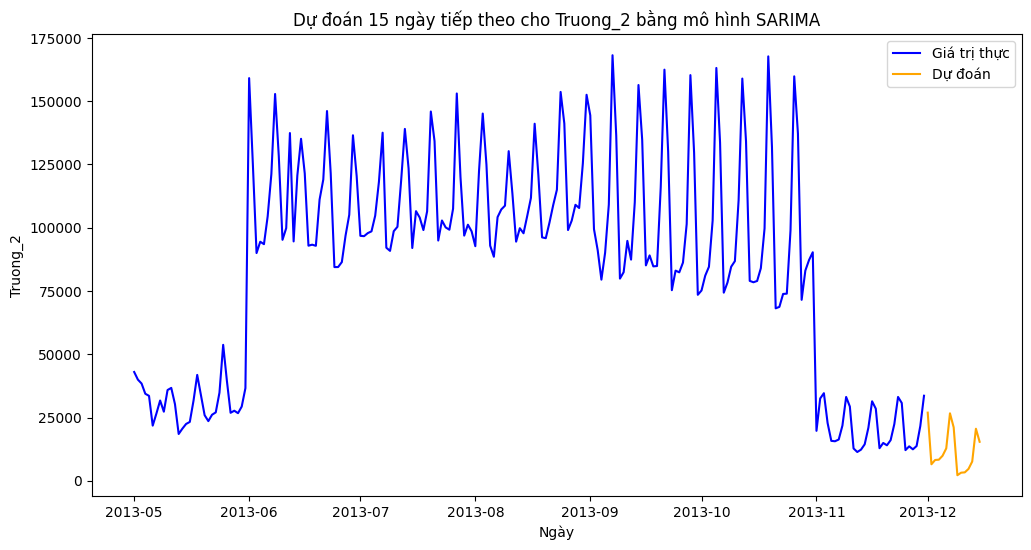

In [71]:
# Dự đoán 15 ngày tiếp theo
forecast = model_fit.forecast(steps=15)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(daily, label='Giá trị thực', color='blue')
plt.plot(forecast, label='Dự đoán', color='orange')
plt.xlabel('Ngày')
plt.ylabel('Truong_2')
plt.title('Dự đoán 15 ngày tiếp theo cho Truong_2 bằng mô hình SARIMA')
plt.legend()
plt.show()

ARIMAX

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

exog = np.random.randn(len(daily))
stepwise_model = auto_arima(daily, exogenous=exog, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=7,
                            start_P=0, seasonal=False,
                            d=1, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
print(stepwise_model.summary())

model = SARIMAX(daily, order=stepwise_model.order, exog=exog)

model_fit = model.fit()

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4907.684, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4914.556, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4916.132, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4914.661, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4912.559, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4853.269, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4878.088, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4855.250, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4855.947, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4861.653, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4878.629, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4869.004, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4851.259, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4905.685, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]          

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


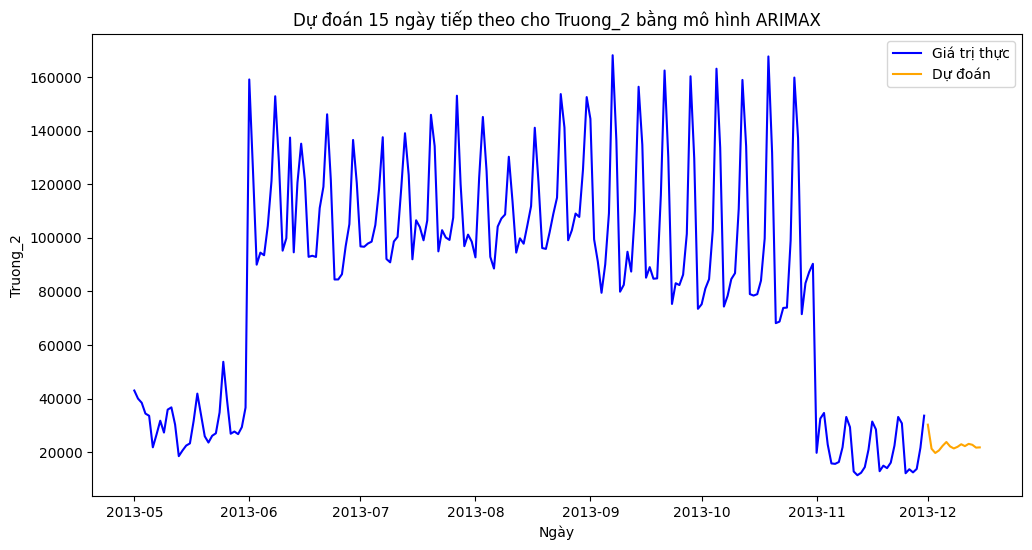

In [75]:
forecast = model_fit.forecast(steps=15, exog=np.random.randn(15, 1))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(daily, label='Giá trị thực', color='blue')
plt.plot(forecast, label='Dự đoán', color='orange')
plt.xlabel('Ngày')
plt.ylabel('Truong_2')
plt.title('Dự đoán 15 ngày tiếp theo cho Truong_2 bằng mô hình ARIMAX')
plt.legend()
plt.show()